# 1、tan_hotel_7k.csv


0. **下载地址：** 
    [Github](https://github.com/SophonPlus/ChineseNlpCorpus/raw/master/datasets/ChnSentiCorp_htl_all/ChnSentiCorp_htl_all.csv)


1. **数据概览：** 
    7000 多条酒店评论数据，5000 多条正向评论，2000 多条负向评论


2. **推荐实验：** 
    情感/观点/评论 倾向性分析


2. **数据来源：**
    [携程网](http://www.ctrip.com/)


3. **原数据集：** 
    ChnSentiCorp_htl，由 [谭松波](http://people.ucas.ac.cn/~0012244) 老师整理的一份数据集


4. **加工处理：**
    1. 将原来 1 万个离散的文件整合到 1 个文件中
    2. 将负向评论的 label 从 -1 改成 0
    3. 去重


5. **字段说明:**

| 字段 | 说明 |
| ---- | ---- |
| label | 1 表示正向评论，0 表示负向评论 |
| review | 评论内容 |


6. **构造平衡语料:**
    - 原数据集中还包含了 3 份平衡语料：ChnSentiCorp_htl_ba_2000, ChnSentiCorp_htl_ba_4000, ChnSentiCorp_htl_ba_6000
    - 用随机抽样的方法，很容易构造出类似的平衡语料

In [6]:
import pandas as pd

pd_all = pd.read_csv('./csv/tan_hotel_7k.csv')

print('评论数目（总体）：%d' % pd_all.shape[0])
print('评论数目（正向）：%d' % pd_all[pd_all.label==1].shape[0])
print('评论数目（负向）：%d' % pd_all[pd_all.label==0].shape[0])

pd_all.sample(10)

评论数目（总体）：7766
评论数目（正向）：5322
评论数目（负向）：2444


,label,review
1274,1,地理环境不错，但对面一直在盖楼，门前的街道打车不方便。
1134,1,总体很不错，房间设计很合理，尤其是有漂亮的卫生间，上海的宾馆总是设计的很精致体贴，楼下的餐厅...
2094,1,是所住过的酒店里感觉最温馨的，的的确确是一种宾至如归的感觉，谢谢啦！
2085,1,"威海合庆饭店的服务特别周到,特别人性化的服务.走南闯北住过很多酒店,但是从来没有1家象威海合..."
2397,1,太子酒店，就是《酒店风云》的拍摄地啊！出差东莞就入住这儿，同事们很兴奋的要拍照纪念。而且，太...
2061,1,该酒店性价比较高，还能免费上网打电话，虽然我们最后没有使用，但是还是值得向大家推荐。
5001,1,酒店房间很好，浴室在房间中间，但要小心一定要把窗帘拉下，对面就是办公楼。酒店服务非常到位。绝...
6023,0,锦江贵宾楼我已经入住很多次了，我之所以选择它，是因为地理位置好，但是服务水平比较差，而且餐饮...
6906,0,前台服务员3人，办理的只有1人，其他人据说是实习的不会办入住和退房，站一边看着，一般要等15...
2092,1,因为看到各位携程网友的留言评价很高，就顶了。入住之后，果然名不虚传，服务非常好，酒店的设施也...


In [7]:
# # 构造平衡语料

# pd_positive = pd_all[pd_all.label==1]
# pd_negative = pd_all[pd_all.label==0]

# def get_balance_corpus(corpus_size, corpus_pos, corpus_neg):
#     sample_size = corpus_size // 2
#     pd_corpus_balance = pd.concat([
#         corpus_pos.sample(sample_size, replace=corpus_pos.shape[0] < sample_size), 
#         corpus_neg.sample(sample_size, replace=corpus_neg.shape[0] < sample_size)
#     ])
#     print('评论数目（总体）：%d' % pd_corpus_balance.shape[0])
#     print('评论数目（正向）：%d' % pd_corpus_balance[pd_corpus_balance.label==1].shape[0])
#     print('评论数目（负向）：%d' % pd_corpus_balance[pd_corpus_balance.label==0].shape[0])    
#     return pd_corpus_balance

# ChnSentiCorp_htl_ba_2000 = get_balance_corpus(2000, pd_positive, pd_negative)
# ChnSentiCorp_htl_ba_2000.sample(10)

# 2.1、ts_evaluate.csv


0、 御温泉数据库语料
1、 处理为需要的csv，保存

In [12]:
import pandas as pd
import json
import math
from numpy import NaN
from pandas import Series, DataFrame
import numpy as np
import pandas as pd

df = pd.read_csv('./source/ts_evaluate.csv')
df.head(10)

,evaluate_id,uid,type,row_id,level_data,content,ctime,is_anonymous,table,attach_id,is_show
0,1,145724,NaN,1711093029,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",非常好,1510308468,1,order,NaN,1
1,2,145724,NaN,1711093029,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",非常好,1510308565,1,order,NaN,1
2,3,145724,NaN,1711093028,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",非常好,1510366978,1,order,NaN,1
3,4,145724,NaN,1711093020,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",非常好,1510367565,1,order,NaN,1
4,5,70870,NaN,1710143133,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",好评,1510832488,1,order,NaN,1
5,6,21875,NaN,1709143024,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",挺不错的,1510974794,1,order,NaN,1
6,7,149925,NaN,1711104283,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",不错,1511161880,1,order,NaN,1
7,8,71746,NaN,1710313307,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",非常好,1511747525,1,order,NaN,1
8,9,152490,NaN,1711133142,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",好评,1511946968,1,order,NaN,1
9,10,147048,NaN,1711103437,"a:4:{s:5:""total"";s:1:""5"";s:7:""service"";s:1:""5""...",好开心一次泡温泉与美食同行，美食琳琅满目，回味无穷，期待商家多D发行优惠券，这样的话这个冬天...,1511958637,1,order,3929;3930,1


In [14]:
j = df.to_json(orient='index')
j = json.loads(j)

new_df = pd.DataFrame({'label': {}, 'review': {}})
str_num = 0

for idx, val in enumerate(j):
    content = df.loc[idx, 'content']
    if isinstance(content, str):
        content = content.replace("\n", "")
        content = content.replace("\r", "")
        content = content.replace(",", "，")
        level_data = str(j[str(idx)]['level_data'])
        split = level_data.split('"total";s:1:"')
        score = int(split[1][0])
        if score <= 3:
            score = "0"
        else:
            score = "1"
        new_line = [score, content]
        new_df.loc[str_num] = new_line
        str_num += 1

new_df = new_df.drop_duplicates()
new_df.to_csv("./imperial_hotspring_03k.csv", index=False)
new_df.sample(10)

,label,review
94,1,好赞
32,0,以后都不敢来睡觉了
199,1,房間乾淨，設備齊全；每個區域的服務員態度很好；温泉區池多，每個池不大，水夠熱，更衣室設備齊全...
229,1,赞?
165,1,这是我满意一次的温泉，人不多，水清。住的地方干净，服务态度好。庙会有特色，东西好吃。
189,1,夜晚楼道噪音较大，影响睡眠
301,1,一切都挺好的，不好的就是时间过太快了???
149,1,住過十多次了，你說讚不讚??
79,1,小朋友玩得很开心，第一次来，一家三口都觉得很新鲜，吃货很适合，一直吃，没停过，东西很新鲜，可...
4,1,好评


# 2.2、imperial_hotspring_03k.csv

看看处理后的御温泉语料

In [15]:
import pandas as pd

df = pd.read_csv('./csv/imperial_hotspring_03k.csv')

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

df.sample(10)

评论数目（总体）：328
评论数目（正向）：289
评论数目（负向）：39


,label,review
137,1,住過十多次了，你說讚不讚??
141,1,續住，很滿意！^_^
301,1,但人員太小！可以多一點員工好多都玩不弓
116,1,太棒啦
204,1,好吃好喝好玩
178,1,提前過母親節٩(๑´0`๑)۶，御溫泉的體驗不錯，裝修風格有點日式又有點古色古香，特別是大餐...
131,1,十分满意，房间十分满意，服务十分满意！期待下次再来~
196,1,体验感极佳，可以说是温泉度假村里的海底捞？服务一流，工作人员都非常nice，各个小细节也都非...
74,1,超好，好满足！！！
130,0,第二次来，比较失望，庙会的服务态度十分恶略（特别是图下此人，2个人排队15分钟，刚1人去倒垃...


# 3、ctrip_hotspring_22k.csv

携程十个热门温泉，评论超2000

数据库操作时：
    - navicat创建数据库和字段都要用utf8bm4
    - 评论字段，4096的长度
    - 导出用LF换行
    - 查询一定要赋值原来数据库的字符


In [16]:
import pandas as pd

df = pd.read_csv('./csv/ctrip_hotspring_22k.csv')

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

df.sample(10)

评论数目（总体）：22277
评论数目（正向）：20902
评论数目（负向）：1375


,label,review
16159,1,汤池数量好多啊，有50个左右呢，不过都是露天的，周边环境还可以，温泉功效很多呢，泡着很舒服的
1057,1,预定简单快捷，优惠力度大。景点的整体服务不错，有吃有泡的，舒服，一天呆了6个小时，春节继续去享受。
712,0,服务还是没得说，但是水不像以前那么好，更像自来水，还有很多地方在装修，还没有告示，钱照收，有...
14740,1,一直以来，汤山温泉都是非常出名的，很久以前坐车经过汤山就能看到很多温泉的招牌，一号温泉建的也...
15295,1,路线方便快捷，服务周到，环境优美
22143,1,小鱼温泉很有意思，还有大鱼疗，鱼超大，不过泡的人不多。
14453,1,一个海洋主题温泉，环境休静，各大小池令人舒缓压力，放松身心，不错！
1625,1,服务不错，泡温泉期间还有服务生送水！泡完可以桑拿，还有小型水果，面包自助餐吃！相当周到！小汤...
17944,1,9.18日下午四点多来到国信南山 今天是我的生日 客服人员特别热情 还送了水果 整洁的殿堂 ...
15586,1,上午去的，人比较适中，下午渐渐人多了


# 4、ctrip_hotel_29k.csv

携程十个热门温泉主题酒店，评论超2000

In [17]:
import pandas as pd

df = pd.read_csv('./csv/ctrip_hotel_29k.csv')

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

df.sample(10)

评论数目（总体）：29337
评论数目（正向）：27538
评论数目（负向）：1799


,label,review
21331,1,环境不错，服务也很好！
22572,1,服务很好！
11331,1,大概是淡季，住的轩辕饭店，房间很新，很大。酒店环境很好，还有小吃相送。午餐在中餐厅点餐，价位...
9540,1,非常喜歡的溫泉酒店
11641,1,早餐还行，晚餐也是在饭店吃的，价位不算贵，两个人3个菜181，但是和黄山市区比还是贵的比较明...
11157,1,再次打卡黄山，依旧选择黄山温泉度假酒店。上次来住的临泉楼，这次住了轩辕楼，房间设施更棒。从硬...
19583,0,这个天没暖气！霉味这么重！被子也没多的！设施也是老旧！真的对的起500-600多的房价？开什...
29013,1,不错的，环境优美。
27206,1,环境很好
4145,1,适合带孩子去玩，还有配套的温泉，孩子们特别喜欢


# 5、所有语料拼接：all_corpus_57k.csv

御温泉300，谭松波酒店7000，携程温泉22000，携程温泉酒店29000

In [18]:
import pandas as pd

df1 = pd.read_csv('./csv/imperial_hotspring_03k.csv')
df2 = pd.read_csv('./csv/tan_hotel_7k.csv')
df3 = pd.read_csv('./csv/ctrip_hotspring_22k.csv')
df4 = pd.read_csv('./csv/ctrip_hotel_29k.csv')

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

df = df.drop_duplicates()

df.to_csv("./all_corpus_57k.csv", index=False)

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

df.sample(10)

评论数目（总体）：57226
评论数目（正向）：51615
评论数目（负向）：5611


,label,review
3400,1,挂牌三星；房间大，布置有特色，墙上挂画是亮点；1楼旺鑫阁餐厅吃饭方便；5楼足浴对住店客人有打...
19562,1,超级好！服务好，环境好，下次还来！
103,1,公司年会，很不错耶，服务态度点赞，点赞，点赞
12357,1,温泉风景如画，空气也很好，服务态度也不错，到2楼做了个按摩8号技师手法杠杠的，值得下次再来
15462,1,设备齐全，环境不错，全家玩的很开心，下次有机会还会再去，价格可以再降低点就亲民了
17799,1,一个不错的景点，蒸鸡蛋很有意思！温泉就一般了，景色不错！
4598,1,环境很不错，酒店的园林很大，很安静，也很漂亮。只是酒店的服务生清理房间的速度较慢，微笑地主动...
18602,1,非常有特色，值得体验一下，有机会一定还会来！ 【性价比】超高 【趣味】强 【景色】怡人
33003,1,房间设施完善，看着干净卫生，服务理念很好，工作人员服务很周到，下次再来，泡温泉很近。
42261,0,酒店在半山中，本地自驾车是不能开到酒店门口，需要停在山下停车场，停车场距离酒店有很远的距离，...


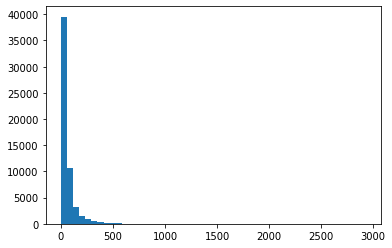

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./all_corpus_57k.csv')

review_len = int(df.shape[0])
list_ = []

for i in range(review_len):
    review = str(df.loc[i, 'review'])
    list_.append(review) 
        
all_length = [len(i) for i in list_]

plt.hist(all_length, bins=50)

plt.show()

# 最长在3000

# 6、正负样本均衡

    - 在all_corpus_57k.csv中，正样本51615，负样本5611，总体57226，正负样本比例接近9.2：1。
        其实对深度学习是还可以的，不要一个batch内几乎全是一类样本就还可以，


    - 稍微均衡一下，
        合成4000个新负样本，最后超出260长度丢弃时会少很多负样本
        
        
            
    - 最后得到all_corpus_58k.csv：
        评论数目（总体）：58266
        评论数目（正向）：50431
        评论数目（负向）：7835
        正负样本比例接近，6.4:1

# 6.1、取负样本，保存为all_corpus_57k_neg_5k.csv

In [237]:
import pandas as pd

df = pd.read_csv('./all_corpus_57k.csv')

neg = df[df.label==0]

neg.to_csv("./all_corpus_57k_neg_5k.csv", index=False)

neg.sample(10)

,label,review
48350,0,差差差差差差差差差，真的太差以后都不到这家
46988,0,公寓酒店房间设施捡漏，整栋楼看不到一个服务人员，楼层过道灯都没有，房间电话不通。还不如七天连...
7455,0,房间残旧，天花发霉，卫生间马桶冲洗不干净。没有窗户，排气不好。以后不用钱都不去哪里住了
7093,0,优点：1.地理位置不错，临近外滩、南京路、豫园；缺点：1.设置陈旧、装修和环境糟糕，价格比较...
7923,0,汇东大酒店：1、商务单间和普通单间可以说基本没有区别（就房间大小和配套），主要的区别就是楼层...
49045,0,整天一般般
31862,0,还好吧啊啊
17201,0,火山地质公园真的是个坑！只有一个坑！千万不要去！浪费钱～
7849,0,一般，就是宾馆设计比较有特色，但是服务实在一般。
6908,0,7月21日就提交了订单，结果7月26日我们其中2个朋友先行到达酒店，他们由于2人中一位未带有...


# 6.2、统计all_corpus_57k_neg_5k.csv

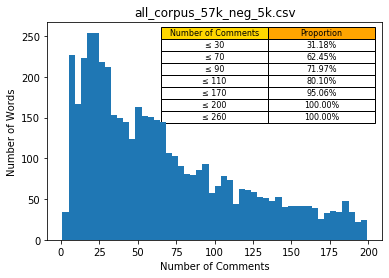

In [4]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 注意，这里是负样本！
# 看看负面评论文本长度分布

neg = pd.read_csv('./all_corpus_57k_neg_5k.csv')

neg_len = int(neg[neg.label==0].shape[0])
list_ = []

for i in range(neg_len):
    review = str(neg.loc[i, 'review'])
    
    # 比较分布
    if len(review) < 200:
        list_.append(review) 

# 长度分布
all_length = [len(i) for i in list_]

# plt.hist，条形图；bins，条形的个数，
plt.hist(all_length, bins=50)

plt.title('all_corpus_57k_neg_5k.csv')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Words')

val_30 = "{:.2f}%".format(np.mean(np.array(all_length) <= 30)*100)
val_70 = "{:.2f}%".format(np.mean(np.array(all_length) <= 70)*100)
val_90 = "{:.2f}%".format(np.mean(np.array(all_length) <= 90)*100)
val_110 = "{:.2f}%".format(np.mean(np.array(all_length) <= 110)*100)
val_170 = "{:.2f}%".format(np.mean(np.array(all_length) <= 170)*100)
val_200 = "{:.2f}%".format(np.mean(np.array(all_length) <= 200)*100)
val_260 = "{:.2f}%".format(np.mean(np.array(all_length) <= 260)*100)
col_labels = ['Number of Comments', 'Proportion']
table_vals = [
    ['≤ 30', val_30],['≤ 70', val_70],['≤ 90', val_90],
    ['≤ 110', val_110],['≤ 170', val_170],['≤ 200', val_200],
    ['≤ 260', val_260]
]
col_colors = ['gold','orange']
col_widths=[0.32, 0.32]
plt.table(
    cellText=table_vals, colLabels=col_labels,
    colWidths=col_widths, colColours=col_colors,
    cellLoc='center',loc='best'
)


# 多至少：30、60、90阶梯，然后逐渐减少
plt.show()

# 6.3、根据原有的5k负样本，合成新的负样本，保存为new_neg_3k.csv

In [9]:
import pandas as pd
import random
import synonyms

# 分割原始负样本，短句放列表

df = pd.read_csv('./all_corpus_57k_neg_5k.csv')

list_sentence = []

df_len = int(df[df.label==0].shape[0])

for i in range(df_len):
    review = str(df.loc[i, 'review'])
    review = review.replace("\n", "")
    review = review.replace("\r", "")
    
    if "，" in review:
        phrase = review.split("，") 
        for idx in range(len(phrase)):
            if len(phrase[idx]) >= 2:
                list_sentence.append(phrase[idx]) 
    else:
        phrase = review.split("。") 
        for idx in range(len(phrase)):
            if len(phrase[idx]) >= 2:
                list_sentence.append(phrase[idx]) 

random.shuffle(list_sentence)

print(len(list_sentence))
print(list_sentence)

40221
['枕头太低了不好睡', '令人没有食欲', '不说也罢', '更不要说帮客人拿行李了。前台态度也不好', '内部住客加上散客', '南田温泉离海棠湾近', '休息区内的服务也少的可怜', '果断订票', '温泉好细', '而且8楼调试', '俗话说"便宜没好货","一分价钱一分货",建议携程网不要再向客户推荐该酒店.', '更谈不上出言不逊。五、酒店零距离泳池房在你入住前一天是客满的', '温泉就是假的', '设备老旧。在里面玩的大多是外国人和老年团的人。再就是带孩子去的。带着孩子玩还可以', '永远不会在这里住', '就是我住的标房B没有。这样最起码的服务都没有', '只听到地方话的大声喧哗按服务指南无法拨长途', '但仍旧是一股浓重的霉味。被子阴冷潮湿', '7到8个客户等着提和寄', '景区有点小', '永远不会再去~！！', '其他实在不敢恭维。入住时发现茶杯里有半杯水', '就试试', '我奉劝看过此贴的朋友', '不像三星的酒店', '儿童乐园很不错。酒店餐饮偏贵', '就要先感冒了。 泡了这么多温泉', '电梯、走廊、房间内铺设的地毯', '我对五星级产生了怀疑', '后面又说公安部门不会为此发文', '壁纸损坏有霉点。补充点评2008年8月5日：幸好只住了一天就去华客', '郁闷', '马上就说我乱拎东西到马桶内', '但是但是浴袍收费', '前提是我空调开到22度', '等了20分钟才来', '这温泉还没被泡到', '不知道平时是不是这个情况', '装修质量很差。预订两夜', '房间感觉就像是纸糊的', '这时我真的发火了', '酒店设施太差', '很难制冷', '晚上泡不了温泉', '我五一假期住了一晚', '离温泉还有一小短路不方便', '窗下堆放疑似废弃的棉被等物品', '住的房间靠近马路', '钱我不差', '服务也不行', '基本不是纯温泉', '房间阴暗一股怪味', '粗燥简陋。服务不好', '不到5分钟便由保安劝慰回房了', '环境特别好', '房间打扫的不干净（桌下竟然有一只脏袜子）', '老酒店了', '游人太多', '实际入住后见到的房间是我所见过的最小的标准间', '从楼层电梯可以直接到温泉区。但是房间卫生不太好', '要赔偿的。晕！！！什么黄页呀。问了半天', '从来没有任何酒店做过任何评价', '害得绕来绕去

In [241]:
# 近义词替换（一个短句，候选前3个同义词，条件相似度大于0.90）

list_sentence_synonyms = []

for idx,text in enumerate(list_sentence):
    if idx % 5000 == 0:
        print(str(idx) + "/" + str(len(list_sentence)))
    text_seg = list(synonyms.seg(text))
    for no_word in range(1,4):
        for i in range(len(text_seg[0])):
            if len(synonyms.nearby(text_seg[0][i])[0]) != 0 and synonyms.nearby(text_seg[0][i])[1][no_word] >= 0.90:
                    text_seg[0][i] = str(synonyms.nearby(text_seg[0][i])[0][1])         
        text_replaced = "".join(text_seg[0])
        if text_replaced != text:
            list_sentence_synonyms.append(text_replaced)
            
list_sentence_short = [i for i in list_sentence if len(i) <= 5]
list_sentence = list_sentence_short + list_sentence_synonyms
random.shuffle(list_sentence)

print("list_sentence_short:" + str(len(list_sentence_short)))
print("list_sentence_synonyms:" + str(len(list_sentence_synonyms)))
print("list_sentence:" + str(len(list_sentence)))

0/40221
5000/40221
10000/40221
15000/40221
20000/40221
25000/40221
30000/40221
35000/40221
40000/40221
list_sentence_short:7189
list_sentence_synonyms:12154
list_sentence:19343


# 6.4、检查5611个负样本时的分布，调整new_neg_3k.csv

In [242]:
# 拼接随机2~8句（不能太小又大）

num_new_neg = 3000
list_new_neg = []

for i in range(num_new_neg):
    
    # 分布随机比例
    rand = random.randint(0, 1000)
    
    # 停顿
    pause_1 = "，" if random.randint(0, 100) % 2 == 0 else "。"
    pause_2 = "，" if random.randint(0, 100) % 2 == 0 else "。"
    pause_3 = "，" if random.randint(0, 100) % 2 == 0 else "。"
    pause_4 = "，" if random.randint(0, 100) % 2 == 0 else "。"
    pause_5 = "，" if random.randint(0, 100) % 2 == 0 else "。"
    pause_6 = "，" if random.randint(0, 100) % 2 == 0 else "。"
    pause_7 = "，" if random.randint(0, 100) % 2 == 0 else "。"

    # 句子
    sentence_1 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    sentence_2 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    sentence_3 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    sentence_4 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    sentence_5 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    sentence_6 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    sentence_7 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    sentence_8 = list_sentence[random.randint(0, len(list_sentence) - 1)]
    
    # 评论
    new_neg_1 = sentence_1 + pause_1 + sentence_2
    new_neg_2 = new_neg_1 + pause_2 + sentence_3
    new_neg_3 = new_neg_2 + pause_3 + sentence_4
    new_neg_4 = new_neg_3 + pause_4 + sentence_5
    new_neg_5 = new_neg_4 + pause_5 + sentence_6
    new_neg_6 = new_neg_5 + pause_6 + sentence_7
    new_neg_7 = new_neg_6 + pause_7 + sentence_8
    
    
    # 尽量符合原始的评论分布，大致根据比例调整
    if rand <= 330:
        new_neg = new_neg_1
    elif 330 < rand <= 610:
        new_neg = new_neg_2
    elif 610 < rand <= 620:
        new_neg = new_neg_3
    elif 620 < rand <= 630:
        new_neg = new_neg_4
    elif 630 < rand <= 650:
        new_neg = new_neg_5
    elif 650 < rand <= 690:
        new_neg = new_neg_6
    else:
        new_neg = new_neg_7
    
    list_new_neg.append(new_neg)
    
    
neg_df = pd.DataFrame({'label': {}, 'review': {}})

for idx, val in enumerate(list_new_neg):
    neg_df.loc[idx] = ["0", val]

neg_df.to_csv("./new_neg_3k.csv", index=False)

neg_df.sample(10)

,label,review
2417,0,其它尚可。，环境好，服务比较差，我想要这事对富丽来讲不是偶然。本身房间差异并不是相当大。所以...
2735,0,所以大概是上午2点左右才过去的。然而，二楼大堂吃饭
273,0,无论从服务。最后近上午2点给我们换了个标间。体验感极差
564,0,因为酒店相当大，名气大
2600,0,服务很差，很吵。接着是早上睡觉半夜2点还在吵，你收多少多不算多！她居然说和你讲不清楚，态度十...
2780,0,就知道骗钱，周围很荒凉，她依然说管不了
1771,0,"早餐不好.周围环境还行.一早CHECK-OUT时,大冷的天,我们两男生有好几件行李,叫坐在那..."
762,0,刀磨的是十分的快呀！下次不会住了。不知道请的什么厨师？2、依然是早餐的问题
2861,0,太差，准确来说。下午0点入住，有两位前台的小伙子告诉他我房间可以升级的。客房。态度很好
2375,0,并希望您能再度人住镇江大酒店。。回来的时候是服务台帮忙订车


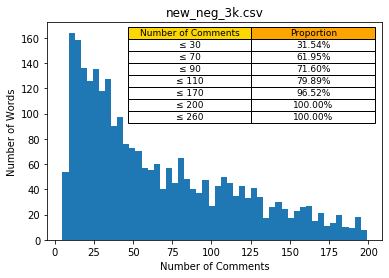

In [5]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

neg = pd.read_csv('./new_neg_3k.csv')
neg_len = int(neg[neg.label==0].shape[0])

list_ = []
for i in range(neg_len):
    review = str(neg.loc[i, 'review'])
    if len(review) < 200:
        list_.append(review)
        
all_length = [len(i) for i in list_]
plt.hist(all_length, bins=50)
plt.title('new_neg_3k.csv')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Words')

val_30 = "{:.2f}%".format(np.mean(np.array(all_length) <= 30)*100)
val_70 = "{:.2f}%".format(np.mean(np.array(all_length) <= 70)*100)
val_90 = "{:.2f}%".format(np.mean(np.array(all_length) <= 90)*100)
val_110 = "{:.2f}%".format(np.mean(np.array(all_length) <= 110)*100)
val_170 = "{:.2f}%".format(np.mean(np.array(all_length) <= 170)*100)
val_200 = "{:.2f}%".format(np.mean(np.array(all_length) <= 200)*100)
val_260 = "{:.2f}%".format(np.mean(np.array(all_length) <= 260)*100)
col_labels = ['Number of Comments', 'Proportion']
table_vals = [
    ['≤ 30', val_30],['≤ 70', val_70],['≤ 90', val_90],
    ['≤ 110', val_110],['≤ 170', val_170],['≤ 200', val_200],
    ['≤ 260', val_260]
]
col_colors = ['gold','orange']
col_widths=[0.37, 0.37]
plt.table(
    cellText=table_vals, colLabels=col_labels,
    colWidths=col_widths, colColours=col_colors,
    cellLoc='center',loc='best'
)

plt.show()

# 这个图，纵坐标是个数，字数移动，生成4000的和原来5611，大致一样就行

# 6.5、原始样本+新负样本=拼接样本，all_corpus_60k_.csv

In [245]:
import pandas as pd

df1 = pd.read_csv('./all_corpus_57k.csv')
df2 = pd.read_csv('./new_neg_3k.csv')

df_ = pd.concat([df1, df2], ignore_index=True)

df_3 = df_[df_.label==1]
df_4 = df_[df_.label==0]

df = pd.concat([df_3, df_4], ignore_index=True)


df = df.drop_duplicates()

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])


df.sample(10)

df.to_csv("./all_corpus_60k_.csv", index=False)

评论数目（总体）：60226
评论数目（正向）：51615
评论数目（负向）：8611


# 6.5、丢弃最大长度为260，all_corpus_58k.csv



负样本最大长度可以达到3000，这里虽然是丢弃好像很浪费，其实之前截取拼接负样本的时候，已经把后面的有用上了

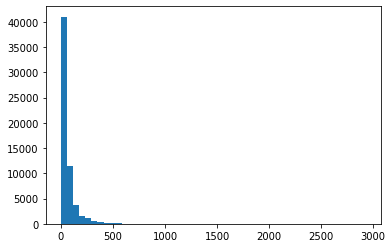

In [248]:
import matplotlib.pyplot as plt
import pandas as pd

# 看看分布

df = pd.read_csv('./all_corpus_60k_.csv')

review_len = int(df.shape[0])
list_ = []
# review_len

for i in range(review_len):
    review = str(df.loc[i, 'review'])
    
#     if len(review) < 260:
#         list_.append(review) 

#     if len(review) < 500:
#         list_.append(review) 

    list_.append(review) 
        
all_length = [len(i) for i in list_]

plt.hist(all_length, bins=50)

plt.show()

# 最长3000，可见500，取到260（256）

In [249]:
# 看看有多少超过260
len_num = 0

review_len = int(df.shape[0])

for i in range(review_len):
    if len(str(df.loc[i, 'review'])) > 260:
        len_num += 1

print(len_num)

print(np.mean(np.array(all_length) < 260))

1960
0.9671238335602563


In [250]:
# 直接抛弃；不要剪裁，会在剪裁的地方猛增

row_to_delete = []
review_len = int(df.shape[0])

for i in range(review_len):
    if len(str(df.loc[i, 'review'])) > 260:
        row_to_delete.append(i)

# 删除row_to_delete列表内，index值的行
df = df.drop(row_to_delete, axis = 0,inplace = False)

# 保存
df.to_csv("./all_corpus_58k.csv", index=False)

# 6.6、查看all_corpus_58k.csv

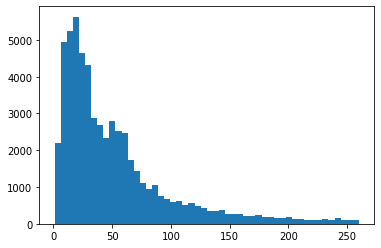

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./all_corpus_58k.csv')

review_len = int(df.shape[0])
list_ = []

for i in range(review_len):
    review = str(df.loc[i, 'review'])
    list_.append(review) 
        
all_length = [len(i) for i in list_]

plt.hist(all_length, bins=50)

plt.show()

In [28]:
print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

# df = df[df.label==0]
df.sample(10)

评论数目（总体）：58266
评论数目（正向）：50431
评论数目（负向）：7835


,label,review
2458,1,总体感觉比较好，环境有一点吵，因为挨近一条高架路。服务态度很好。
16030,1,愉快的一次旅游，适合一家大小，亲朋戚友欢聚旅游
52241,0,非常不愉快的入住。朋友是晚上11：30左右到达的，此时的柜台服务只有1人，连服务生整个大堂只...
50498,0,优点就不说了，说说缺点吧。1、前台的POS机真的该换换了，刷卡慢的出奇。1、前台服务员态度也...
44663,1,环境安静，优美。设施齐全，服务员态度热情。
9398,1,第一次去涵田，室内的高中和张刘纪服务态度非常好！谅解引导的非常到位！服务态度让人觉得比较亲切...
44670,1,温泉很好，那个大游泳池相当霸气。从房间可以直接到温泉，住店客人要在房间换好衣服过去，不能使用...
851,1,酒店位置很好，中山陵里面，梅花山旁边，走过去很近。但是房价和价格不成正比，大堂很豪华但是冷清...
21567,1,服务态度很好，自助餐不错，主要是温泉水质好，儿童乐园非常适合孩子游玩
37422,1,温泉不错，酒店太久。


# 6.7、打乱样本、

In [253]:
# import pandas as pd

# df = pd.read_csv("./all_corpus_58k.csv")
# df = df.sample(frac=1).reset_index(drop=True)

# df.to_csv("./all_corpus_58k_shuffle.csv", index=False)
# df

,label,review
0,1,淡季的时候来到热海，又是一个可以拍出神仙照片的地方。90多度的温泉咕嘟咕嘟滚动，泉水清澈，3...
1,1,服务非常满意，临走还送了当地的土鸡蛋，给个大大的赞哈
2,1,携程预订 方便 诚信 很棒 值得信赖
3,1,早旅很好，很丰盛。加床要与酒店确认。一出酒店就是温泉，方便。
4,0,国庆期间订了副楼套房，差得不止一点点，家俱破旧，电视机小得不得了，想象不出的简陋
5,1,本次行程还是很愉快的，就是大门比较难找，汤池该有的都有了，比较中意里面的汗蒸。人也不是特别的...
6,1,"宾馆的服务是可以的,房间的硬减设施也可以,就是电视好象应该换了!酒点的地理位置在市中心,出行..."
7,1,?ོ?ོ?ོ?ོ?ོ
8,1,确实不错，值得推荐。
9,1,给我们免费升级了套房，房间超级大，早餐也丰富。停车畅停，就是泡个温泉泡到餐厅都下班了酒店门口...


# 7、测试集处理

    - 在test_corpus_13k.csv中，
        评论数目（总体）：13412
        评论数目（正向）：12375
        评论数目（负向）：1037
        正负样本比例，12.9:1
        
        
    - 测试集不做样本均衡，看auc

# 7.1、查看qunar_hotspring_9k.csv

In [21]:
import pandas as pd

df = pd.read_csv('./csv/qunar_hotspring_9k.csv')

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

df.sample(10)

评论数目（总体）：9106
评论数目（正向）：8406
评论数目（负向）：700


,label,review
8506,1,已经去了好几次了，设施一流，泡一泡全身舒畅！
5458,1,每年三亚行回程前一天必领家人去这家泡温泉
4677,1,特别不错 环境非常好 值得一游
1980,1,不错，温泉看着很好看，还在温泉里蒸了鸡蛋吃
4627,1,小鱼太好玩了，就是人多，看来大家都是奔着这个来的。里面有个大鱼池，不过建议先在小鱼池适应一下...
4881,1,很漂亮的室外热带温泉池，很多温泉，重要的是很干净，吃的一般吧，就是解饱，可以带吃的，洗澡的地...
6270,1,很好玩哦，项目有又多
6371,1,各种温泉都有，最有意思的是小鱼温泉，小鱼的啄食很舒服
3136,1,到处都是温泉好舒服，上午去比较好
700,1,环境真的不错，只是刚好到达的时候下雨了，影响了游玩的心情！浴袍只每人一件，泡完冲凉的时候才给...


# 7.2、查看qunar_hotel_4k.csv

In [22]:
import pandas as pd

df = pd.read_csv('./csv/qunar_hotel_4k.csv')

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

df.sample(10)

评论数目（总体）：4323
评论数目（正向）：3986
评论数目（负向）：337


,label,review
1378,1,床边就是美景
182,0,服务很好，温泉很棒，庙会大餐虽然人巨多吃啥都要排队但是还是吃得很开心，好吃！但是！！！我要给...
4190,1,别墅关键特别好，适合情侣来浪漫
2035,0,房间窗户很小不能打开，下次不会考虑，定金本来要付现金的，但是酒店不收，只能刷信用卡，但是到现...
1311,1,亲子非常好的酒店，非常满意
1689,1,常州恐龙谷温泉度假酒店位于环球恐龙城旅游景区内，距中华恐龙园东门约500米，距沪宁高速常州入...
3383,1,非常满意。有山有水有温泉，环境优美，风景自然。为出差，旅游，度假之首选，夏季来的更好，人少安...
1453,1,夜色中的酒店外景 给孩子准备的儿童浴袍，可爱极了 咖啡胶囊机，对于爱喝咖啡的我来说，真是美翻...
3510,1,酒店环境很好，我们订的湖景房，酒店后面就是温泉，1楼有个很大的儿童乐园，谢谢魏和平、柳琳、吴...
2134,1,小孩很喜欢，玩得不肯走。服务态度很好。但水质有些脏


# 7.3、test_corpus_13k.csv

In [23]:
import pandas as pd

df1 = pd.read_csv('./csv/qunar_hotspring_9k.csv')
df2 = pd.read_csv('./csv/qunar_hotel_4k.csv')

df_ = pd.concat([df1, df2], ignore_index=True)

df_3 = df_[df_.label==1]
df_4 = df_[df_.label==0]

df = pd.concat([df_3, df_4], ignore_index=True)

df = df.drop_duplicates()

df.to_csv("./test_corpus_13k.csv", index=False)

print('评论数目（总体）：%d' % df.shape[0])
print('评论数目（正向）：%d' % df[df.label==1].shape[0])
print('评论数目（负向）：%d' % df[df.label==0].shape[0])

df.sample(10)

评论数目（总体）：13412
评论数目（正向）：12375
评论数目（负向）：1037


,label,review
11060,1,一进房间就给了我像家一样的感觉，就是这个范儿！温馨，温暖！不愧百分百好评！推荐 一进门都爬上...
7509,1,就在恐龙园旁边，里面装修环境都还可以，但是对比其他地方的温泉度假村没有什么特别超过别家的地方...
9928,1,庭院房很大，环境很舒适，温泉也不错，天冷了酒店没开热空调，前台很贴心的送来了小太阳供暖，酒店...
11821,1,酒店在小山丘上，大堂是五层，酒店另一侧靠湖边，湖景房就是对着湖那一侧，有个小阳台，可以晒衣服...
11908,1,非常好，儿童乐园太好了又大，和平、利利、丹丹还陪玩，非常感谢，小朋友玩的非常好！
2173,1,非常值得去的景点，风景很好！
3739,1,尤其是小雨温泉♨️很舒服，可惜去那天遇上下大雨
11650,1,酒店?的环境非常好?，服务人员非常热情。一楼还有一个亲子乐园，小盆友也非常喜欢在里面玩耍，乐...
12541,0,马站乡的火山地质公园景区包括大小空山，票区内有热气球可坐，可以空中观看火山。
10273,1,房间很大，但是确实有些老旧了，房间阳台的温泉池也很老旧，体验比较差，环境还好，比较安静，就是...


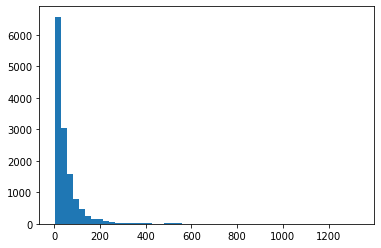

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./test_corpus_13k.csv')

review_len = int(df.shape[0])
list_ = []

for i in range(review_len):
    review = str(df.loc[i, 'review'])
    list_.append(review) 
        
all_length = [len(i) for i in list_]

plt.hist(all_length, bins=50)

plt.show()

# 最长在1200

# 7.4、test_corpus_6k.csv


    虽然用auc分析性能，
    但是考虑一个在bert的batch_size只能取较小值，
    这样一个batch内若大概率只有一种类型的样本，
    会造成计算不出auc，为nan

    因此，对测试集做简单负采样，
    使得正负样本比例接近5:1

In [8]:
import pandas as pd

df = pd.read_csv('./test_corpus_13k.csv')

df_pos = df[df.label==1]
df_neg = df[df.label==0]

# 正负样本比例
proportion = 5
neg_num = df_neg.shape[0]
pos_num = neg_num * proportion

df_pos_need = df_pos.sample(pos_num)
df_ = pd.concat([df_pos_need, df_neg], ignore_index=True)
df_ = df_.drop_duplicates()

df_.to_csv("./test_corpus_6k.csv", index=False)

df_.sample(10)

,label,review
4492,1,人太多，不管是哪人都多，温泉水很脏，都不想下去
2904,1,过去的时候跟随导航进入了修路的一段，经过横山的，把车子弄得好脏，还老担心刮底，郁闷死了。提醒...
1935,1,不错，比好汉坡的好，但他家自助太难吃了……
184,1,晚上去的，基本人很少，温度也适宜，泡泡温泉挺舒服，也便宜，下次还去。
2046,1,定的天景房到店后被免费升级成了水景大床房房间很大温泉环境很好酒店离恐龙园很近
1136,1,服务不错，不过蚊子有点多
5656,0,自助餐差，魚儿溫泉魚儿太少，春節人多不干净
1866,1,度假酒店很大，高速下来5公里就到，路好好找，还有鳄鱼公园，冬天鳄鱼冬眠没去。特意订了有温泉池...
5452,0,一般吧，去过一次，绝对不想去第二次的。路线图不太清楚。可去可不去
612,1,方便快捷，还省钱！！！


# 7.5、查看test_corpus_6k.csv

In [29]:
import pandas as pd

df_ = pd.read_csv('./test_corpus_6k.csv')

print('评论数目（总体）：%d' % df_.shape[0])
print('评论数目（正向）：%d' % df_[df_.label==1].shape[0])
print('评论数目（负向）：%d' % df_[df_.label==0].shape[0])

df_.sample(10)

评论数目（总体）：6222
评论数目（正向）：5185
评论数目（负向）：1037


,label,review
2635,1,妈妈很喜欢，但是我们去的早，好多池子都没放水，小鱼池鱼很大
2995,1,态度真的一级棒！换水换的很勤快、无论年轻的还是稍微有点年纪的服务员 都特别敬业、很和蔼可亲！...
3527,1,早餐自助，吃的很饱，午饭和晚饭只有自助（但是自助的菜品品质不是特别好），没去试中餐厅，据说是...
5020,1,不错不错，没去过的都值得一去哟！
189,1,哈呵呵，非常好，推荐给大家，下次还来
925,1,环境幽静，服务好
467,1,不光是可以游玩，而且还可以泡温泉。景色秀丽，价位稍高。
2513,1,环境很美 房间挺大 庭院里面的木质浴桶很让人惊喜 虽然有点雷雨 但雨后泡温泉的感觉很浪漫 房...
5154,1,热海还是值得去的～没有在哪里泡温泉～鸡蛋可以在山下买了去蒸～好吃
5733,0,严重低于预期，平地上建公园，公园里造几个温泉池子，性价比低低低。唯一算还不错的是五六十的自助...
